In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Reading in and preparing the data. 

The "Bundesamt für Statistik" in Switzerland publishes data about the number of nights tourists stay in Switzerland. I will work with the data for the canton of Bern. The data is available [here](https://www.pxweb.bfs.admin.ch/default.aspx?px_language=de). I selected the dataset containing the nights and the country of origin of the tourists. Before reading it into Pandas, I cleaned the data in the spreadsheet program. 

In [5]:
# Read in the csv.
df = pd.read_csv("data/tourism_bern_UTF8.csv", sep=";", header=0)
df.head(3)

,Herkunftsland,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04
0,Schweiz,31656.0,29053.0,34611.0,38476.0,40227.0,43511.0,37236.0,45161.0,47092.0,...,41334.0,47883.0,48506.0,47865.0,45621.0,36398.0,32109.0,35313.0,39971.0,41498.0
1,Baltische Staaten,68.0,34.0,42.0,82.0,72.0,118.0,48.0,113.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deutschland,8884.0,9102.0,10493.0,11352.0,12262.0,13971.0,14522.0,17403.0,14759.0,...,10641.0,12812.0,12333.0,12083.0,11426.0,8115.0,8043.0,9505.0,10878.0,9919.0


In [6]:
# Grab the new header for later use.  
header = df['Herkunftsland']

# Change the orientation of the dataframe. 
df = df.transpose()
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
Herkunftsland,Schweiz,Baltische Staaten,Deutschland,Frankreich,Italien,Österreich,Vereinigtes Königreich,Irland,Niederlande,Belgien,...,Vereinigte Arabische Emirate,Serbien und Montenegro,Kroatien,Rumänien,Russland,Slovakei,Slowenien,Tschechische Republik,Ukraine,Serbien
2005-01,31656,68,8884,2001,1389,1213,1429,90,1165,497,...,NaN,106,47,198,918,81,44,221,108,NaN
2005-02,29053,34,9102,1903,1146,892,1433,37,1384,502,...,NaN,71,52,74,336,62,64,94,100,NaN


In [7]:
# Correction to the header
df = df.ix[1:]
df.columns = header
df.head(3)

Herkunftsland,Schweiz,Baltische Staaten,Deutschland,Frankreich,Italien,Österreich,Vereinigtes Königreich,Irland,Niederlande,Belgien,...,Vereinigte Arabische Emirate,Serbien und Montenegro,Kroatien,Rumänien,Russland,Slovakei,Slowenien,Tschechische Republik,Ukraine,Serbien
2005-01,31656,68,8884,2001,1389,1213,1429,90,1165,497,...,NaN,106,47,198,918,81,44,221,108,NaN
2005-02,29053,34,9102,1903,1146,892,1433,37,1384,502,...,NaN,71,52,74,336,62,64,94,100,NaN
2005-03,34611,42,10493,2034,1361,954,1567,69,1488,577,...,NaN,153,72,258,769,94,23,178,108,NaN


In [8]:
# Convert first row to a timeserie. 
df.index = pd.to_datetime(df.index)
df.head(5)

Herkunftsland,Schweiz,Baltische Staaten,Deutschland,Frankreich,Italien,Österreich,Vereinigtes Königreich,Irland,Niederlande,Belgien,...,Vereinigte Arabische Emirate,Serbien und Montenegro,Kroatien,Rumänien,Russland,Slovakei,Slowenien,Tschechische Republik,Ukraine,Serbien
2005-01-01,31656,68,8884,2001,1389,1213,1429,90,1165,497,...,NaN,106,47,198,918,81,44,221,108,NaN
2005-02-01,29053,34,9102,1903,1146,892,1433,37,1384,502,...,NaN,71,52,74,336,62,64,94,100,NaN
2005-03-01,34611,42,10493,2034,1361,954,1567,69,1488,577,...,NaN,153,72,258,769,94,23,178,108,NaN
2005-04-01,38476,82,11352,2327,1779,1872,1799,122,1255,578,...,NaN,191,38,169,549,74,29,152,23,NaN
2005-05-01,40227,72,12262,2026,1496,1703,1996,143,849,449,...,NaN,91,73,165,1120,70,68,257,103,NaN


## Exploring the data

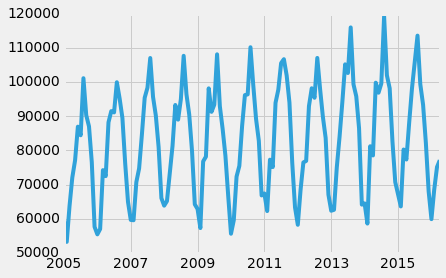

In [9]:
plt.style.use('fivethirtyeight')

# Let's check how the total number overnight stays evolved over time.
df.sum(axis=1).plot()

In [16]:
# Let's check how many overnight stays from Swiss people there are in total.
df['Schweiz'].sum()

5712961.0

In [20]:
# How many guests there are in total for every year? 
df.resample('A').sum().sum(axis=1)

2005-12-31     909656.0
2006-12-31     955490.0
2007-12-31     982832.0
2008-12-31     999426.0
2009-12-31     990190.0
2010-12-31     990776.0
2011-12-31    1021497.0
2012-12-31    1012187.0
2013-12-31    1047648.0
2014-12-31    1051750.0
2015-12-31    1036596.0
2016-12-31     280596.0
Freq: A-DEC, dtype: float64

In [39]:
# What countries besides Switzerland are the most guest coming from? 
country_dict = {}
for i in header:
    country_dict[i] = int(df[i].sum())
df_total = pd.DataFrame(country_dict, index=[0])
df_total = df_total.transpose()
df_total.columns = ['total']
best_guest = df_total.sort_values('total', ascending=False).head(15)
best_guest

,total
Schweiz,5712961
Deutschland,1771343
Vereinigte Staaten von Amerika,426445
Frankreich,297146
Italien,296995
Vereinigtes Königreich,286842
Spanien,193969
Österreich,188651
Niederlande,180377
China,176920


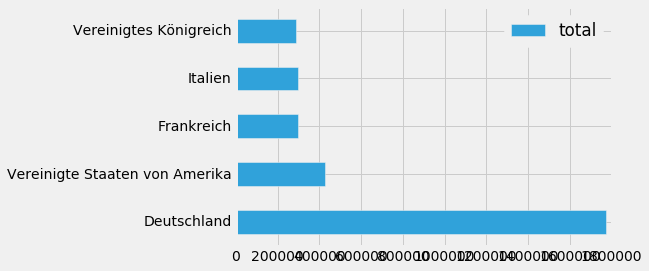

In [40]:
# Making a graph of the most important countries for the hotels in Bern.

df_total.loc[['Deutschland', 'Vereinigte Staaten von Amerika', 'Frankreich', 'Italien', 'Vereinigtes Königreich']].plot(kind='barh')

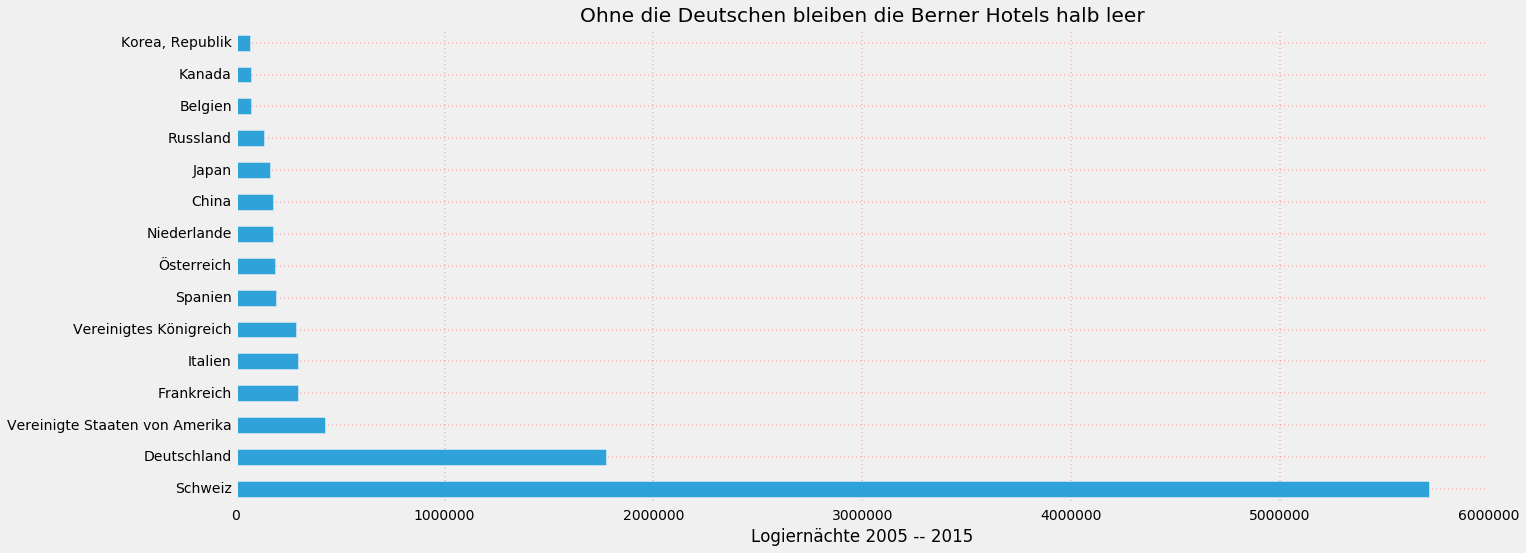

In [41]:
# Making a chart of the most important countries for the hotels in Bern. Attempt II. 

fig, ax = plt.subplots(figsize=(20,8))
best_guest.plot(kind='barh', x=best_guest.index, y='total', legend=None, ax=ax)
ax.set_title('Ohne die Deutschen bleiben die Berner Hotels halb leer')
ax.set_xlabel('Logiernächte 2005 -- 2015')
ax.set_ylabel('')
ax.grid(linestyle=':', linewidth='0.4', color='red')
plt.savefig("bestguest.pdf", transparent=True)

# Let's take this one over to Inkscape to do some polishing...

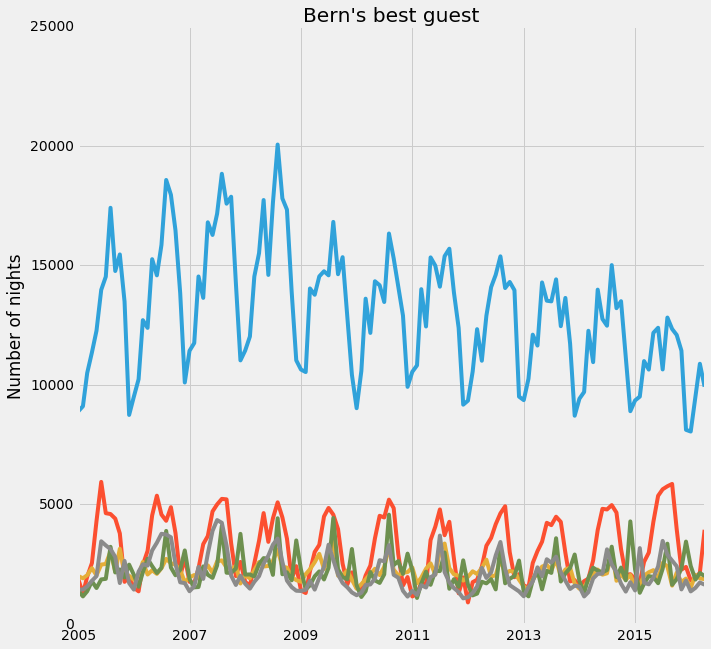

In [42]:
# Here's another attempt.

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df[['Deutschland', 'Vereinigte Staaten von Amerika', 'Frankreich', 'Italien', 'Vereinigtes Königreich']])
ax.set_title('Bern\'s best guest')
ax.set_ylabel('Number of nights')
ax.set_xlabel('')
plt.savefig("bestguest.pdf", transparent=True)

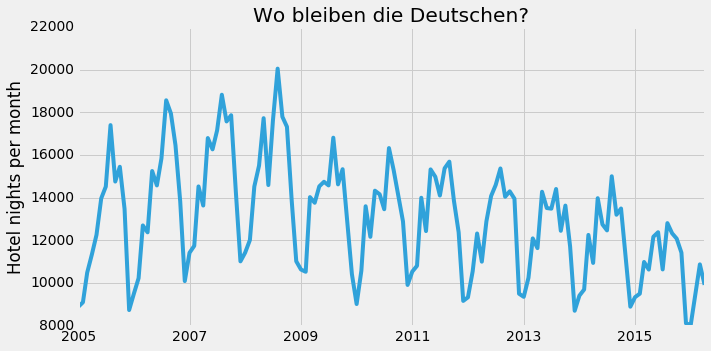

In [43]:
# Let's have a look at the people from Germany.

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['Deutschland'])
# ax.axvline(x='2015-01-15', ymin=0, ymax=.5, label='Aufwertung CH-Franken')
ax.set_title('Wo bleiben die Deutschen?')
ax.set_ylabel('Hotel nights per month')

In [44]:
# Is there a correlation with the development with the Swiss franc?
# Source of the data: Swiss National Bank, https://data.snb.ch/de/topics/ziredev#!/cube/devkum

df_money = pd.read_csv('snb.csv')
df_euro = df_money[df_money['D1'] == 'EUR1']
df_euro.index = pd.to_datetime(df_euro['Date'])
del df_euro['Date']
df_euro.head()


,D0,D1,Value
Date,,,
2005-01-01,M0,EUR1,1.5467
2005-02-01,M0,EUR1,1.5499
2005-03-01,M0,EUR1,1.5489
2005-04-01,M0,EUR1,1.5471
2005-05-01,M0,EUR1,1.5448


In [54]:
df_euro.head()

,D0,D1,Value
Date,,,
2005-01-01,M0,EUR1,1.5467
2005-02-01,M0,EUR1,1.5499
2005-03-01,M0,EUR1,1.5489
2005-04-01,M0,EUR1,1.5471
2005-05-01,M0,EUR1,1.5448


In [61]:
df_deutschland

2005-01-01     8884
2005-02-01     9102
2005-03-01    10493
2005-04-01    11352
2005-05-01    12262
2005-06-01    13971
2005-07-01    14522
2005-08-01    17403
2005-09-01    14759
2005-10-01    15452
2005-11-01    13478
2005-12-01     8738
2006-01-01     9501
2006-02-01    10230
2006-03-01    12703
2006-04-01    12379
2006-05-01    15253
2006-06-01    14576
2006-07-01    15849
2006-08-01    18567
2006-09-01    17948
2006-10-01    16458
2006-11-01    13828
2006-12-01    10095
2007-01-01    11421
2007-02-01    11746
2007-03-01    14530
2007-04-01    13635
2007-05-01    16797
2007-06-01    16267
              ...  
2013-11-01    11715
2013-12-01     8705
2014-01-01     9415
2014-02-01     9699
2014-03-01    12258
2014-04-01    10946
2014-05-01    13979
2014-06-01    12751
2014-07-01    12470
2014-08-01    15006
2014-09-01    13203
2014-10-01    13496
2014-11-01    11164
2014-12-01     8894
2015-01-01     9343
2015-02-01     9505
2015-03-01    10991
2015-04-01    10634
2015-05-01    12171


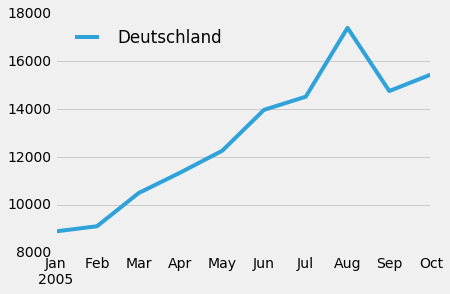

In [64]:
ax = df[0:10].plot(y='Deutschland')
ax

In [65]:
df_euro[0:10].plot(y='Value', color='darkblue', kind='bar', ax=ax)


In [66]:
ax

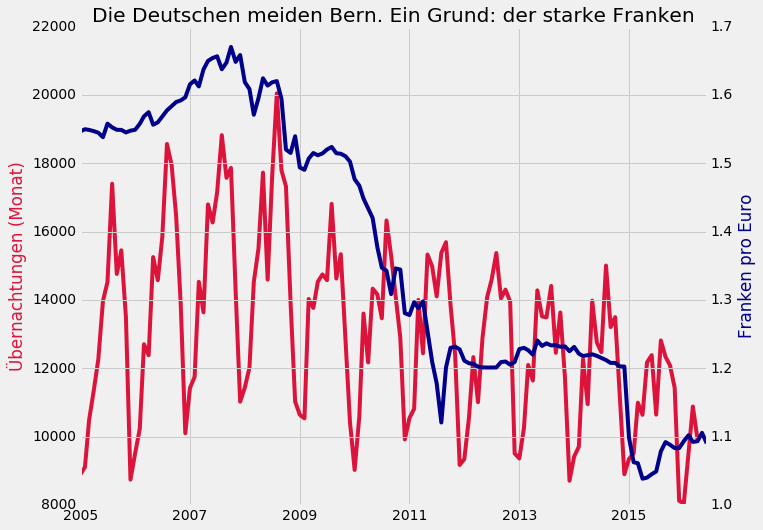

In [72]:
# Let's add the money conversion rate to the graphic.

fig, ax1 = plt.subplots(figsize=(10,8), sharex=True)
ax1.plot(df['Deutschland'], color='crimson')
#ax1.axvline(x='2015-01-15', ymin=0, ymax=1)
ax1.set_title('Die Deutschen meiden Bern. Ein Grund: der starke Franken')
ax1.set_ylabel('Übernachtungen (Monat)', color="crimson")

ax2 = ax1.twinx()

ax2.plot(df_euro['Value'], color='darkblue')
ax2.set_ylabel('Franken pro Euro', color='darkblue')
plt.savefig('europroblem.pdf', tranparent=True)

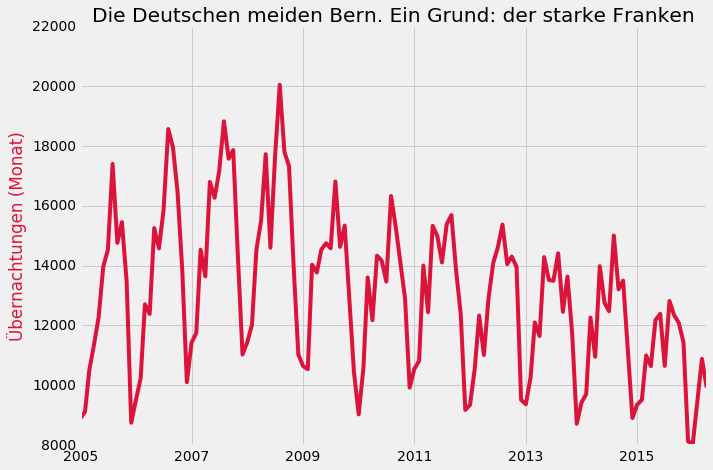

In [15]:
# Let's add the money conversion rate to the graphic.

fig, ax1 = plt.subplots(figsize=(10,7), sharex=True)
ax1.plot(df['Deutschland'], color='crimson')
#ax1.axvline(x='2015-01-15', ymin=0, ymax=1)
ax1.set_title('Die Deutschen meiden Bern. Ein Grund: der starke Franken')
ax1.set_ylabel('Übernachtungen (Monat)', color="crimson")
plt.savefig('europroblem_1.pdf')

# Maybe seperated is better. Let's work with this one in Inkscape. 

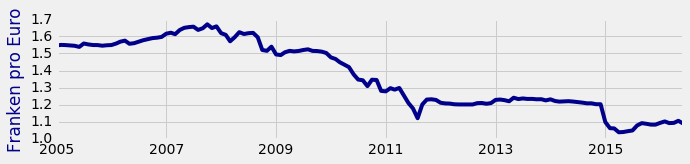

In [16]:
# Let's add the money conversion rate to the graph.

fig, ax2 = plt.subplots(figsize=(10,2), sharex=True)

ax2.plot(df_euro['Value'], color='darkblue')
ax2.set_ylabel('Franken pro Euro', color='darkblue')
plt.savefig('europroblem_2.pdf', tranparent=True)

# Let's take this one over to Inkscape to add to the last one for some polishing. 